# PRACTICE: EDA for Linear Regression with Scikit-Learn

Regression analysis is a statistical technique used to describe relationships among variables

The simplest case to examine is one in which a variable $Y$, referred to as the $dependent$ or target variable, related to one variable $X$, called an $independent$ or explanatory variable.

If the relationship between $Y$ and $X$ is believed to be linear, then the equation for a line may be appropriate:

$Y = β0 + β1X$, where $β$0 is an intercept term and $β$1 is a slope coefficient.


In Linear Regression

    - The Null Hypothesis (H0) is that the coefficients associated with the variables are zero.
    - The alternate hypothesis (Ha) is that the coefficients are not equal to zero (i.e. there exists a relationship between the independent variable in question and the dependent variable).


#### We will organise the notebook. according to the DS steps: 

    Loading the data
    Preparing the data
    Exploratory Data Analysis
    Building the model and accuracy analysis
    Final Analysis of the model


The `Housing dataset`  contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository. We can also access this data from the `scikit-learn` library. 

There are 506 samples and 13 feature variables in this dataset.

<font color=red> The objective is to predict the value of prices of the house using the given features.

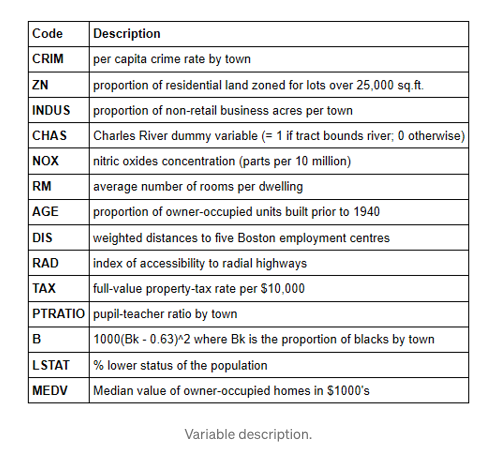

In [30]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #statistical data visualization, used for interactive visualization.

#pip install sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
#load the housing data from the scikit-learn library
boston_data = datasets.load_boston()
boston_data

/home/home/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [32]:
#print the keys of the boston_dataset 
print(boston_data.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


    data: contains the information for various houses
    target: prices of the house (MEDV)
    feature_names: names of the features
    DESCR: describes the dataset

In [33]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
df['MEDV'] = boston_data['target']

In [35]:
#Insert your code here
df.shape

(506, 14)

In [36]:
#Insert your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [40]:
#Insert your code here
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 ## We need to know our data
 
 - We need to identify which feature (Variable we will need in regression algorithm) 
 
 - The accuracy of the Regression model will depend on the variables we will be using.

# Exploratory Data Analysis

EDA is a very important step to get a proper understanding of the data
 - Create some visualization 
 - Identify the correlation 
 
 to see which variables are more relevant for the model.


### What is the nature of the dataset?

  - Is the dataset is following normal distribution or not?
  - Is the dataset noisy, clean?
  - Do variables have outliers?

In [9]:
#Insert your code here
# missing values.
df.isna().sum()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

There are no missing values.

In [45]:
#Insert your code here
#Descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


 <font color=red>Insert your observations
 
 - Age column has a max value of 100, that is quite old! its interesting to investigate if this was a typo or not
 - the column CRIM has mean of 3.6 and median of 0.25; this suggests having either outlier, or typo
 - the column B has range from 0.32 until 396.9, with a large standard deviation of 91


 
 For more clarity lets create some visualization.

([<matplotlib.axis.XTick at 0x7f3f4a629ee0>], [Text(1, 0, 'CRIM')])

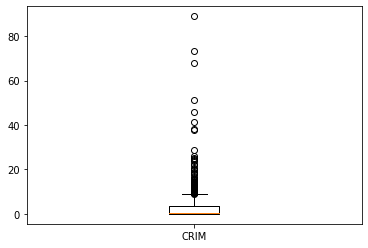

In [55]:
#Insert your code here
plt.boxplot(x=df["CRIM"])
plt.xticks([1], ["CRIM"])

Text(0, 0.5, 'Count')

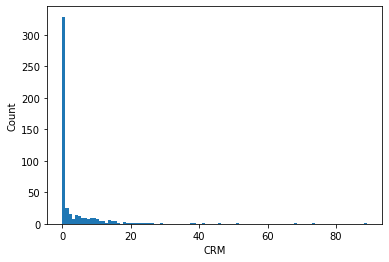

In [63]:
#Insert your code here
plt.hist(df["CRIM"], bins=100)
plt.xlabel("CRM")
plt.ylabel("Count")

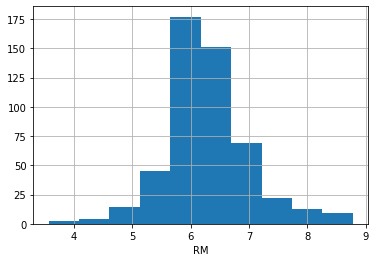

In [75]:
#Insert your code here
plt.hist(df["RM"])
plt.xlabel("RM")

plt.grid(visible=True)
plt.show()

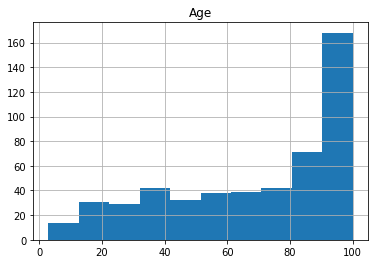

In [76]:
#Insert your code here


plt.hist(df["AGE"])
plt.title("Age")
plt.grid(visible=True)
plt.show()

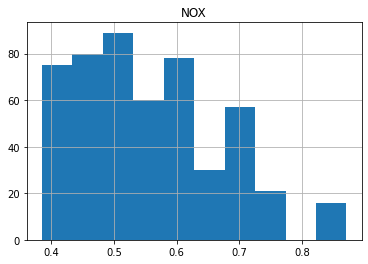

In [77]:
#Insert your code here


plt.hist(df["NOX"])
plt.title("NOX")
plt.grid(visible=True)
plt.show()

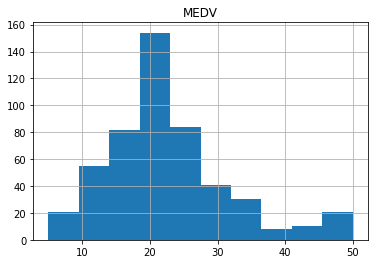

In [79]:
#Insert your code here


plt.hist(df["MEDV"])
plt.title("MEDV")
plt.grid(visible=True)
plt.show()

<AxesSubplot: xlabel='MEDV', ylabel='Count'>

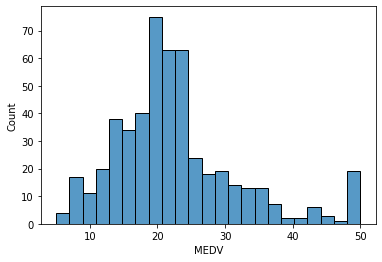

In [105]:
sns.histplot(df["MEDV"])

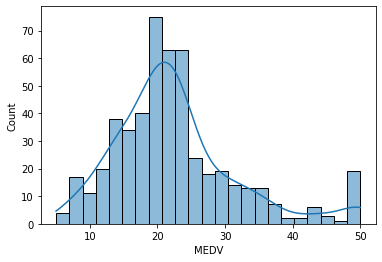

In [17]:
#Insert your code here



<font color=red>Insert your observations
 
 MEDV has a right skewed distribution

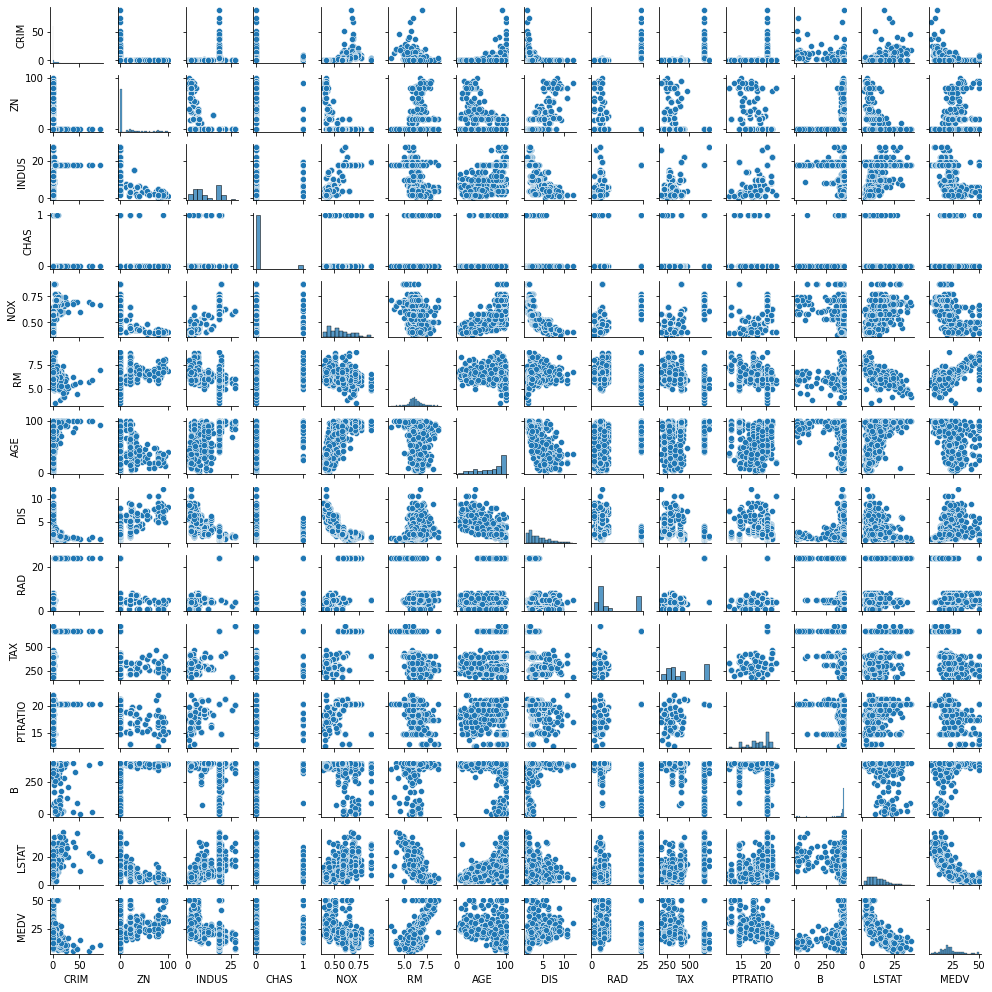

In [106]:
sns.pairplot(df,height=1)
# there are lots of features in the graph so its hard to see the trend tough if you observe RM ,

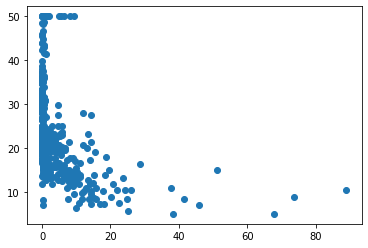

In [109]:
#Insert your code here

plt.scatter(x=df["CRIM"], y=df["MEDV"])

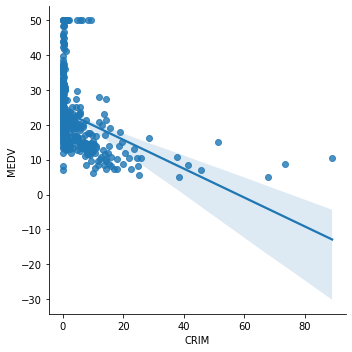

In [20]:
#Insert your code here



There is low CRIM in costly areas. Also, there is negative relation between CRIM and MEDV.

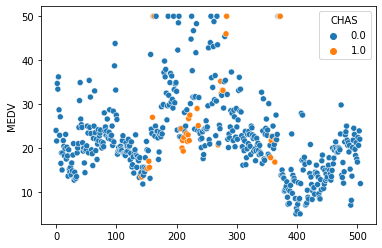

In [21]:
sns.scatterplot(x=np.arange(df.shape[0]), 
                y='MEDV', 
                data=df, 
                hue="CHAS");

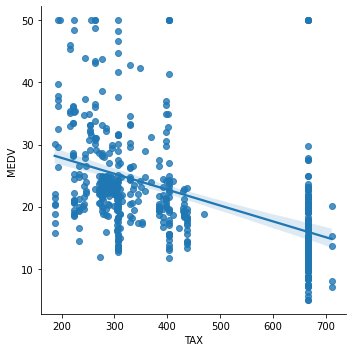

In [22]:
#Checking the relation between TAX and MEDV
#Insert your code here




As the TAX rate increases, the prices are low.

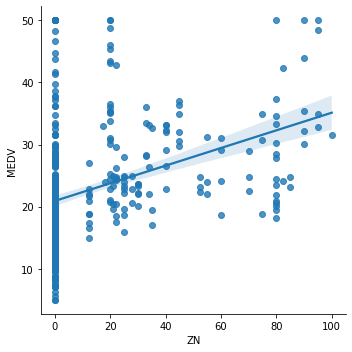

In [23]:
#Checking the relation between ZN and MEDV
#Insert your code here




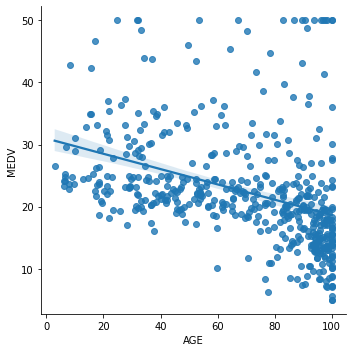

In [24]:
#Checking the relation between AGE and MEDV
#Insert your code here




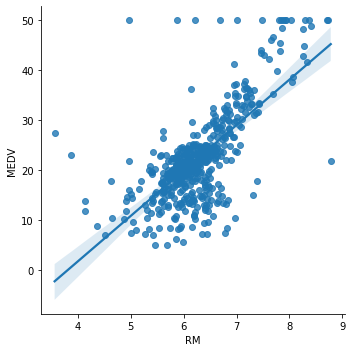

In [25]:
#Checking the relation between RM and MEDV
#Insert your code here



As the number of rooms in a dwelling increases, the price also increases linearly.

/Users/hamzazidoum/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

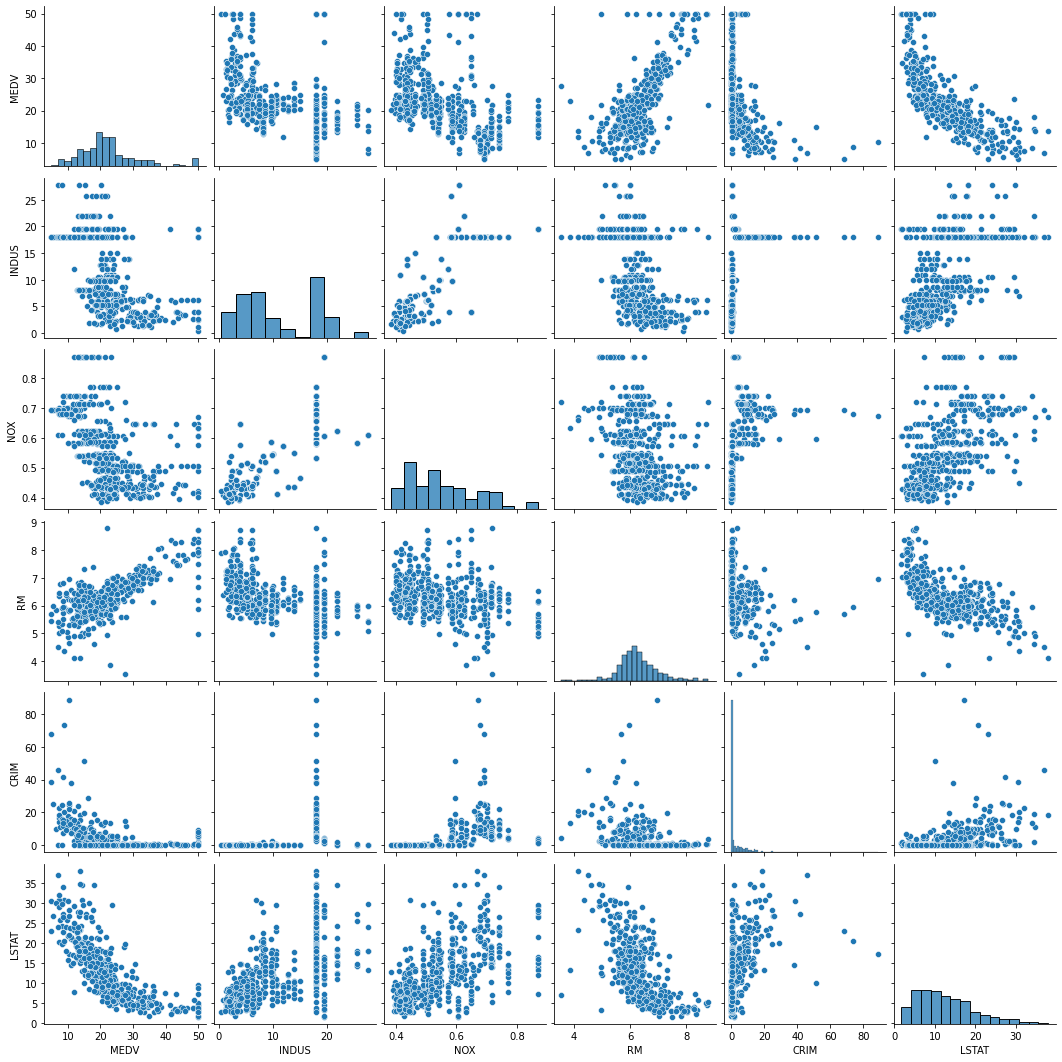

In [26]:
#Insert your code here
#pairplot with selected variables


In [27]:
#correlation matrix
#Insert your code here



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


 <font color = red> Insert your observations

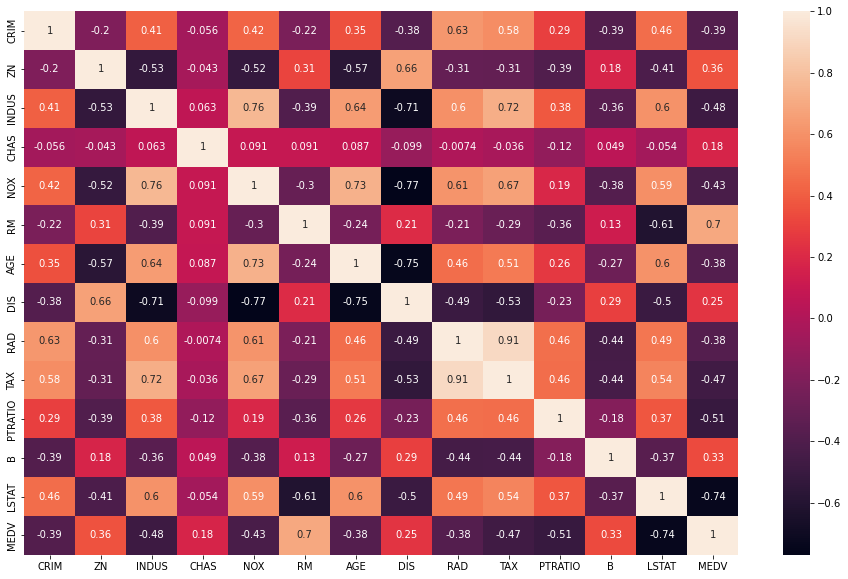

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [29]:
#Insert your code here


positiv_corrs

ZN      0.360445
CHAS    0.175260
RM      0.695360
DIS     0.249929
B       0.333461
MEDV    1.000000
Name: MEDV, dtype: float64

In [30]:
#Insert your code here


negativ_corrs

CRIM      -0.388305
INDUS     -0.483725
NOX       -0.427321
AGE       -0.376955
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [31]:
#Insert your code here


corr

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

# Univariate Linear Regression

Let's take `LTSAT` as $X$ (independent variable).

$Y (MEDV)= β1 + β2X(LSTAT)$


In [32]:
#Insert your code here


X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [33]:
#Insert your code here


Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Sckit-learn is an open-source Machine learning library used for various algorithms such as Regression, Classification, and clustering




In [34]:
#Insert your code here
#Create then fit the regression model



LinearRegression()

In [35]:
#Insert your code here
#What's the model you obained?



array([-0.95004935])

In [36]:
#Insert your code here



34.5538408793831

In [38]:
#Insert your code here
#Evaluate your model - what is r2


MAE=  4.505281166250568
MSE=  38.48296722989415
RMSE: 6.20346413142642
r2 =  0.5441462975864797


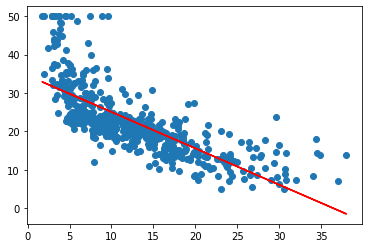

In [39]:
#Insert your code here
#plot



/Users/hamzazidoum/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'MEDV')

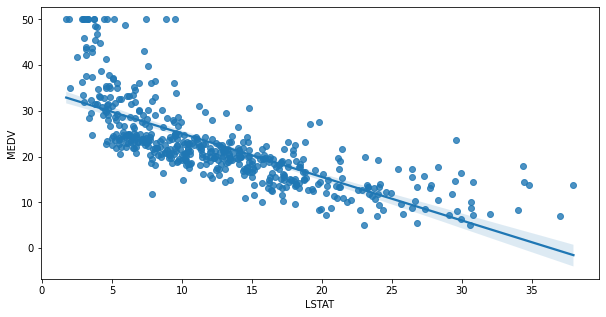

In [40]:
#alternatively
plt.figure(figsize=(10,5))
sns.regplot(X,Y)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [41]:
#MAke predictions for the following values
k=np.array([12.653063, 1.73000, 6.950000, 11.36000, 16.955000, 37.9700]).reshape(-1,1)
#Insert your code here





array([22.53280655, 32.9102555 , 27.95099787, 23.76128022, 18.44575409,
       -1.51953308])

## Conclusion:

<font color=red> Insert your conclusions here

# Univariate Linear Regression

Let's take `RM` as $X$ (independent variable).

$Y (MEDV)= β1 + β2X(RM)$



model.coef_ =  [9.10210898]
model.intercept_ =  -34.67062077643857
MAE=  4.4477729015322325
MSE=  43.60055177116956
RMSE: 6.603071389222561


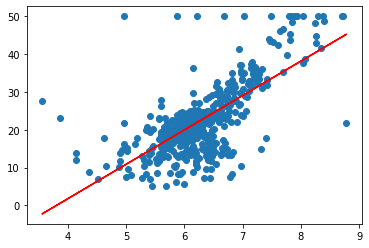

In [42]:
#Insert your code here
#create, fit, and evaluate the model






In [43]:
#MAke predictions:
k=np.array([4,5,6,7,8,9]).reshape(-1,1)
#Insert your code here






array([ 1.73781515, 10.83992413, 19.94203311, 29.04414209, 38.14625107,
       47.24836005])

## Conclusion:

<font color=red> Insert your conclusions here

# Multivariate Regression Analysis

Observations:

 - To fit a linear regression model, we select those features which have a high correlation with our target variable `MEDV`. 
 - By looking at the correlation matrix we can see that `RM` has a strong positive correlation with `MEDV` (0.7) where as `LSTAT` has a high negative correlation with MEDV(-0.74).
 
    <B>Note</B>: An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features `RAD`, `TAX` have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features `DIS` and `AGE` which have a correlation of -0.75.

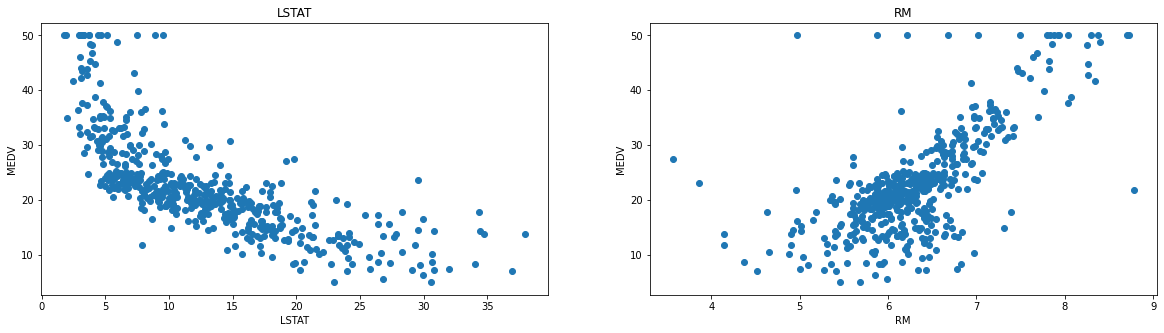

In [44]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

<B>Observations:</B>

 - The prices increase as the value of `RM` increases linearly. There are few outliers and the data seems to be capped at 50.
 - The prices tend to decrease with an increase in `LSTAT`. Though it doesn’t look to be following exactly a linear line.

In [46]:
#Insert your code here







In [54]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [47]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [48]:
#Insert your code here
#split data into train 80% and test 20%





(404, 2)
(102, 2)
(404,)
(102,)


In [49]:
#Insert your code here
# Fit the multiple regression model




LinearRegression()

In [50]:
print('model.coef_ = ', model.coef_)
print('model.intercept_ = ', model.intercept_)




model.coef_ =  [-0.71722954  4.58938833]
model.intercept_ =  2.73624034260661


## Conclusion:

<font color=red> Insert your conclusions here

In [51]:
# model evaluation for training set
#Insert your code here




print("The model performance for training set")
#Insert your code here



# model evaluation for testing set
#Insert your code here


print("The model performance for testing set")
#Insert your code here






The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


`R2 score` is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

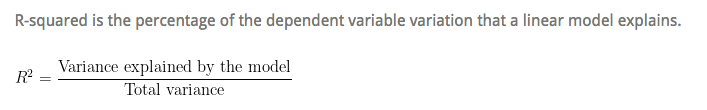

# conclusions
<font color=red> Insert FINAL conclusions here